In [6]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.series import Series
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sys

sys.path.append("../")

from fast_food_nutrition.algo import NutritionCalculator
from fast_food_nutrition.model import FoodIntakeType, Nutrition, Sex

In [8]:
menu_items = pd.read_csv('../tests/data/starbucks/starbucks.csv', index_col=0)

# Hypothesis Testing

In [9]:
menu_items.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [10]:
# Number of null values per column:
menu_items.isnull().sum()

item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

In [11]:
nutrient_columns = ['calories', 'fat', 'carb', 'fiber', 'protein']
score_columns = ['caloric_intake_score', 'fat_intake_score', 'carb_intake_score', 'fiber_intake_score', 'protein_intake_score', 'composite_intake_score']

In [12]:
for name in nutrient_columns:
    column = menu_items[name]
    count = (column == 0).sum()
    print(f"Zeros in column {name} -> {count}")

Zeros in column calories -> 0
Zeros in column fat -> 1
Zeros in column carb -> 0
Zeros in column fiber -> 29
Zeros in column protein -> 9


In [13]:
len(menu_items[menu_items.fiber == 0])

29

In [14]:
menu_items[menu_items.fiber == 0]

,item,calories,fat,carb,fiber,protein,type
3,Apple Fritter,420,20.0,59,0,5,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
8,Bountiful Blueberry Muffin,370,14.0,55,0,6,bakery
9,Butter Croissant,310,18.0,32,0,5,bakery
10,Cheese Danish,420,25.0,39,0,7,bakery
19,Double Fudge Mini Doughnut,130,7.0,16,0,0,bakery
21,Ginger Molasses Cookie,360,12.0,58,0,3,bakery
22,Iced Lemon Pound Cake,490,23.0,67,0,5,bakery
23,Mallorca Sweet Bread,420,25.0,42,0,7,bakery
25,Marble Pound Cake,350,13.0,54,0,6,bakery


In [15]:
len(menu_items[menu_items.protein == 0])

9

In [16]:
menu_items[menu_items.protein == 0]

,item,calories,fat,carb,fiber,protein,type
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery
19,Double Fudge Mini Doughnut,130,7.0,16,0,0,bakery
26,Marshmallow Dream Bar,210,4.0,43,0,0,bakery
31,Petite Vanilla Bean Scone,140,5.0,21,0,0,bakery
51,Birthday Cake Pop,170,9.0,22,0,0,petite
54,Chocolate Creme Whoopie Pie,190,11.0,23,0,0,petite
57,Red Velvet Whoopie Pie,190,11.0,21,0,0,petite
58,Tiramisu Cake Pop,170,9.0,22,0,0,petite
67,Deluxe Fruit Blend,80,0.0,20,2,0,salad


In [17]:
len(menu_items[menu_items.fat == 0])

1

In [18]:
menu_items[menu_items.fat == 0]

,item,calories,fat,carb,fiber,protein,type
67,Deluxe Fruit Blend,80,0.0,20,2,0,salad


In [19]:
menu_items.columns

Index(['item', 'calories', 'fat', 'carb', 'fiber', 'protein', 'type'], dtype='object')

In [20]:
menu_items.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [21]:
menu_items['type'].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [22]:
menu_items[nutrient_columns] = menu_items.groupby('type')[nutrient_columns].transform(lambda row: row.fillna(row.median()))

In [23]:
def get_nutrition(row: Series) -> Nutrition:
    return Nutrition(item=row["item"],
                     calories=row["calories"],
                     fiber=row["fiber"],
                     fat=row["fat"],
                     carb=row["carb"],
                     protein=row["protein"])

In [24]:
menu_items["nutrition"] = menu_items.apply(lambda row: get_nutrition(row), axis=1)

In [25]:
menu_items["caloric_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_caloric_intake_score(nutrition, Sex.COMBINE))
menu_items["fat_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_fat_intake_score(nutrition, Sex.COMBINE))
menu_items["carb_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_carbohyrate_intake_score(nutrition, Sex.COMBINE))
menu_items["fiber_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_fiber_intake_score(nutrition, Sex.COMBINE))
menu_items["protein_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_protein_intake_score(nutrition, Sex.COMBINE))
menu_items["composite_intake_score"] = menu_items["nutrition"].apply(lambda nutrition: NutritionCalculator.get_composite_nutrition_score(nutrition, Sex.COMBINE))

In [26]:
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510


In [27]:
label_encoder = LabelEncoder()
menu_items['type_numeric'] = label_encoder.fit_transform(menu_items['type'])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3


In [28]:
label_encoder = LabelEncoder()
menu_items['item_numeric'] = label_encoder.fit_transform(menu_items['item'])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48


In [29]:
menu_items[['type_numeric', 'type']].value_counts(ascending=True)

type_numeric  type         
5             salad             1
3             parfait           3
6             sandwich          7
1             bistro box        8
2             hot breakfast     8
4             petite            9
0             bakery           41
Name: count, dtype: int64

In [30]:
type_categories = ['salad', 'parfait', 'petite', 'hot breakfast', 'sandwich', 'bakery', 'bistro box']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 'purple', 'yellow']


type_mapping = {menu_item: color for i, (menu_item, color) in enumerate(zip(type_categories, colors))}
type_mapping

{'salad': 'skyblue',
 'parfait': 'lightgreen',
 'petite': 'lightcoral',
 'hot breakfast': 'orange',
 'sandwich': 'lightpink',
 'bakery': 'purple',
 'bistro box': 'yellow'}

In [31]:
menu_items['color'] = menu_items['type'].map(lambda x: type_mapping[x])
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric,color
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0,purple
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1,purple
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2,purple
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5,purple
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6,purple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70,lightpink
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73,lightpink
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36,lightgreen
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48,lightgreen


In [32]:
overall_scores = menu_items.groupby('type')[score_columns].agg('median').drop_duplicates()

In [33]:
overall_scores = overall_scores.sort_values('composite_intake_score')
overall_scores

,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score
type,,,,,,
salad,0.006275,0.000000,0.009599,0.011396,0.000000,0.005256
petite,0.014118,0.054545,0.011039,0.000000,0.003284,0.023142
parfait,0.023529,0.024242,0.027358,0.017094,0.013136,0.023510
hot breakfast,0.026275,0.078788,0.015359,0.008547,0.028736,0.038803
sandwich,0.030588,0.078788,0.021118,0.017094,0.042693,0.041729
bakery,0.029020,0.096970,0.027358,0.011396,0.009852,0.043958
bistro box,0.029804,0.115152,0.016079,0.031339,0.028736,0.051810


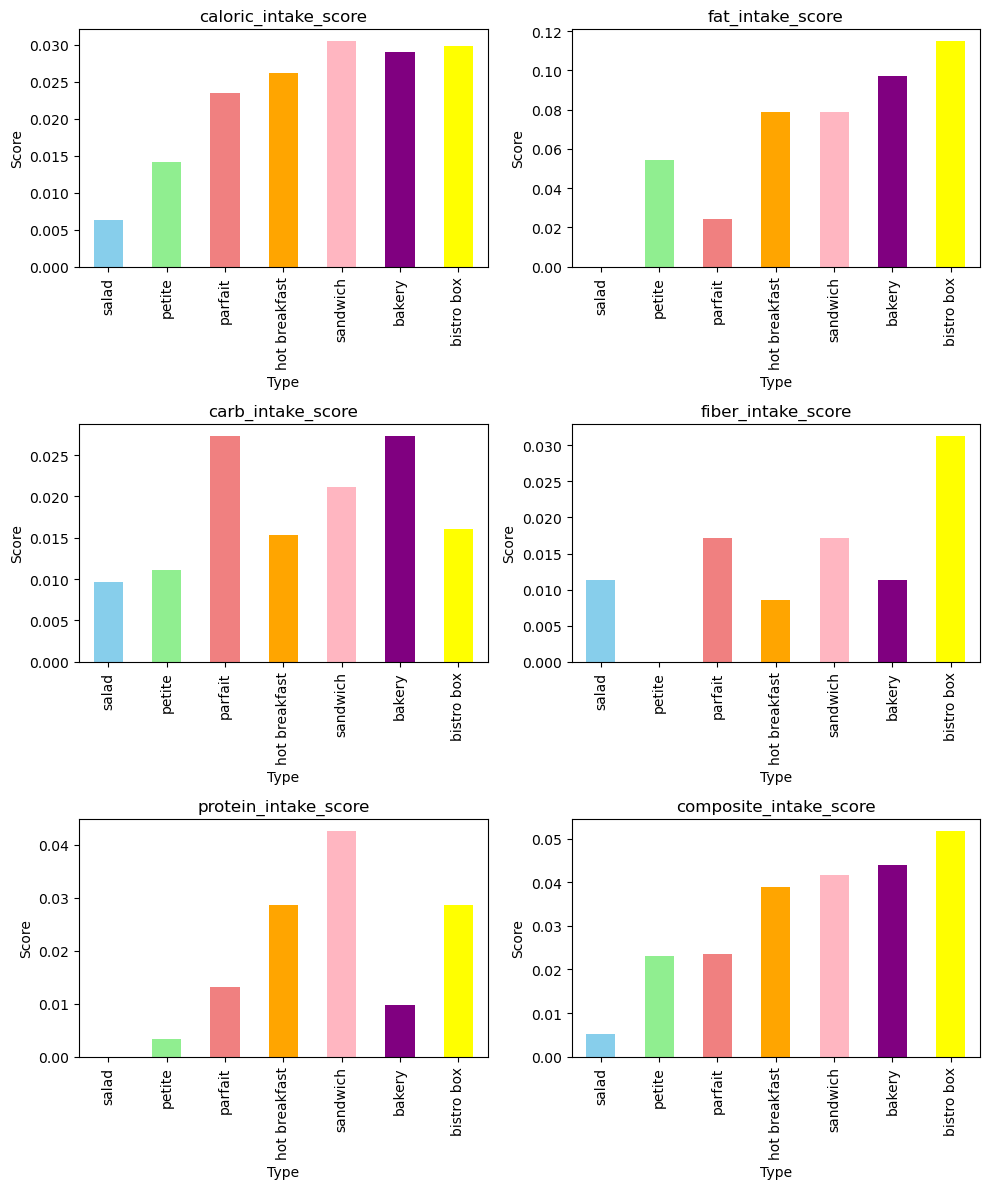

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

for i, column in enumerate(overall_scores.columns):
    row, col = divmod(i, 2)
    overall_scores[column].plot(kind='bar', ax=axes[row, col], color=colors)
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Type')
    axes[row, col].set_ylabel('Score')

plt.tight_layout()
plt.show()

# Based on our nutritional model salads are indeed the most healthy meal.  Therefore, we do not reject the Null Hypothesis based on the fact that salads have the lowest composite score.  Therefore, we reject the Alternative Hypothes  in that salads are not the most unhealthy meal.

# Cluster Analysis

## Visualization

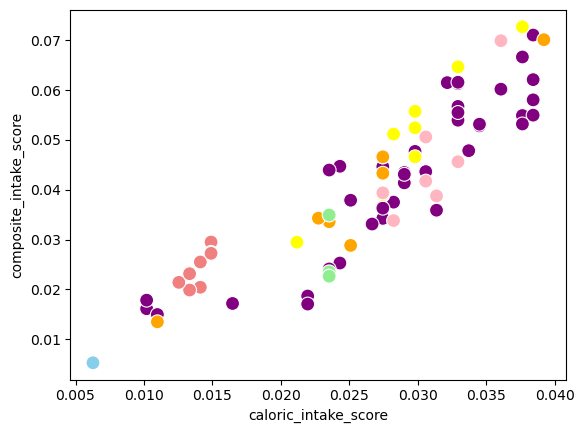

In [46]:
# Create the scatterplot
plt.figure()
sns.scatterplot(data=menu_items, 
                x='caloric_intake_score', 
                y='composite_intake_score', 
                s=100,
                hue=menu_items['type'].values, 
                palette=type_mapping,
                legend=False)
plt.show()

In [47]:
x = menu_items[['caloric_intake_score', 'fat_intake_score', 'carb_intake_score', 'fiber_intake_score', 'protein_intake_score', 'composite_intake_score']].values
x

array([[0.02745098, 0.04848485, 0.03215743, 0.02849003, 0.01642036,
        0.0342548 ],
       [0.02745098, 0.05454545, 0.03071754, 0.03988604, 0.00985222,
        0.0365962 ],
       [0.03294118, 0.12121212, 0.02831773, 0.        , 0.00821018,
        0.0539671 ],
       [0.03843137, 0.11515152, 0.03599712, 0.02279202, 0.01149425,
        0.05804977],
       [0.01019608, 0.03636364, 0.00815935, 0.        , 0.        ,
        0.01610959],
       [0.02901961, 0.08484848, 0.0225582 , 0.02849003, 0.00985222,
        0.04346466],
       [0.03607843, 0.13333333, 0.02927766, 0.01139601, 0.01149425,
        0.0601973 ],
       [0.02901961, 0.08484848, 0.02639789, 0.        , 0.00985222,
        0.0413836 ],
       [0.02431373, 0.10909091, 0.01535877, 0.        , 0.00821018,
        0.04471934],
       [0.03294118, 0.15151515, 0.0187185 , 0.        , 0.01149425,
        0.06130237],
       [0.02980392, 0.1030303 , 0.02447804, 0.01139601, 0.00656814,
        0.04770408],
       [0.02509804, 0

In [48]:
x.shape

(77, 6)

In [49]:
## Model
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(x)
    wcss.append(model.inertia_)
    
wcss

[0.19436081051349086,
 0.08009459240821265,
 0.05801597798556898,
 0.04978786161235667,
 0.03386653602398988,
 0.028655027716905233,
 0.025988243704286797,
 0.025543688123812858,
 0.023416035937465225,
 0.021613314291551517]

Text(0, 0.5, 'WCSS')

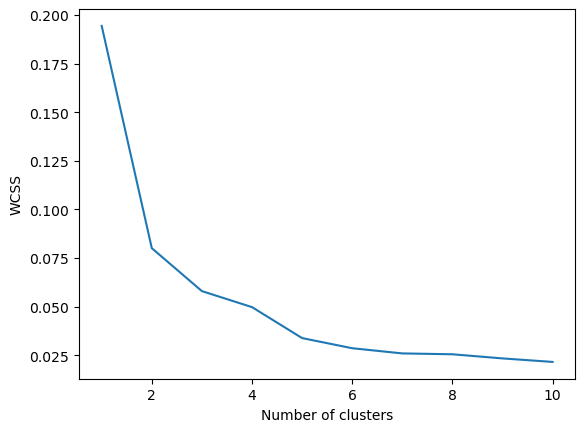

In [50]:
# The following elbow chart tells us that the optimal number of clusters should be 4 even we have 7 different menu item types.

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [79]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = model.fit_predict(x)
y_kmeans

array([1, 2, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 3, 1, 2, 0,
       0, 0, 2, 1, 2, 1, 0, 2, 3, 1, 2, 0, 0, 2, 1, 3, 2, 0, 0, 0, 1, 0,
       2, 0, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1], dtype=int32)

In [80]:
len(y_kmeans)

77

In [81]:
menu_items['cluster'] = y_kmeans
menu_items

,item,calories,fat,carb,fiber,protein,type,nutrition,caloric_intake_score,fat_intake_score,carb_intake_score,fiber_intake_score,protein_intake_score,composite_intake_score,type_numeric,item_numeric,color,cluster
1,8-Grain Roll,350,8.0,67,5,10,bakery,"Nutrition(item='8-Grain Roll', calories=350, f...",0.027451,0.048485,0.032157,0.028490,0.016420,0.034255,0,0,purple,1
2,Apple Bran Muffin,350,9.0,64,7,6,bakery,"Nutrition(item='Apple Bran Muffin', calories=3...",0.027451,0.054545,0.030718,0.039886,0.009852,0.036596,0,1,purple,2
3,Apple Fritter,420,20.0,59,0,5,bakery,"Nutrition(item='Apple Fritter', calories=420, ...",0.032941,0.121212,0.028318,0.000000,0.008210,0.053967,0,2,purple,0
4,Banana Nut Loaf,490,19.0,75,4,7,bakery,"Nutrition(item='Banana Nut Loaf', calories=490...",0.038431,0.115152,0.035997,0.022792,0.011494,0.058050,0,5,purple,0
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery,"Nutrition(item='Birthday Cake Mini Doughnut', ...",0.010196,0.036364,0.008159,0.000000,0.000000,0.016110,0,6,purple,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich,Nutrition(item='Tarragon Chicken Salad Sandwic...,0.032941,0.078788,0.022078,0.034188,0.052545,0.045627,6,70,lightpink,2
74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich,"Nutrition(item='Turkey & Swiss Sandwich', calo...",0.030588,0.078788,0.017279,0.011396,0.055829,0.041729,6,73,lightpink,2
75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait,"Nutrition(item='Greek Yogurt Honey Parfait', c...",0.023529,0.072727,0.021118,0.000000,0.013136,0.034934,3,36,lightgreen,2
76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait,Nutrition(item='Peach Raspberry Yogurt Parfait...,0.023529,0.024242,0.027358,0.017094,0.016420,0.023510,3,48,lightgreen,1


In [103]:
health_cluster_index = ["Food Cluster 1", 
                        "Food Cluster 2", 
                        "Food Cluster 3", 
                        "Food Cluster 4"]

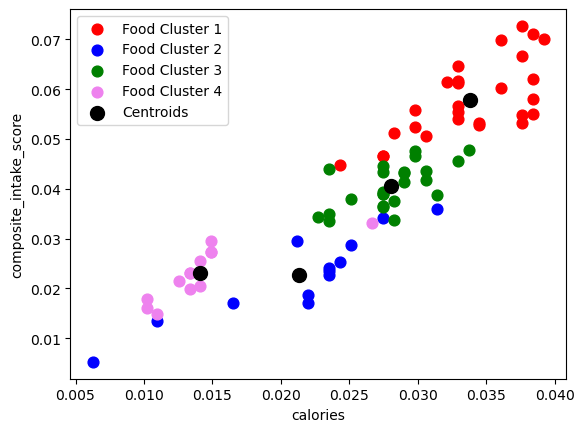

In [104]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 5], s=60, c='red', label=health_cluster_index[0])
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 5], s=60, c='blue', label=health_cluster_index[1])
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 5], s=60, c='green', label=health_cluster_index[2])
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 5], s=60, c='violet', label=health_cluster_index[3])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 5], s = 100, c='black', label='Centroids')
plt.xlabel('calories')
plt.ylabel('composite_intake_score')
plt.legend()
plt.show()

In [105]:
menu_items.iloc[3]

item                                                        Banana Nut Loaf
calories                                                                490
fat                                                                    19.0
carb                                                                     75
fiber                                                                     4
protein                                                                   7
type                                                                 bakery
nutrition                 Nutrition(item='Banana Nut Loaf', calories=490...
caloric_intake_score                                               0.038431
fat_intake_score                                                   0.115152
carb_intake_score                                                  0.035997
fiber_intake_score                                                 0.022792
protein_intake_score                                               0.011494
composite_in

In [106]:
menu_items.iloc[68]

item                                                    Egg Salad Sandwich 
calories                                                                460
fat                                                                    27.0
carb                                                                     37
fiber                                                                     5
protein                                                                  22
type                                                               sandwich
nutrition                 Nutrition(item='Egg Salad Sandwich ', calories...
caloric_intake_score                                               0.036078
fat_intake_score                                                   0.163636
carb_intake_score                                                  0.017759
fiber_intake_score                                                  0.02849
protein_intake_score                                               0.036125
composite_in

In [107]:
menu_items.iloc[9]

item                                                          Cheese Danish
calories                                                                420
fat                                                                    25.0
carb                                                                     39
fiber                                                                     0
protein                                                                   7
type                                                                 bakery
nutrition                 Nutrition(item='Cheese Danish', calories=420, ...
caloric_intake_score                                               0.032941
fat_intake_score                                                   0.151515
carb_intake_score                                                  0.018719
fiber_intake_score                                                      0.0
protein_intake_score                                               0.011494
composite_in

In [108]:
for i, row in menu_items.iterrows():
    print(f"Row: {i}: [{row['item']} -> {health_cluster_index[row['cluster']]} -> {row['composite_intake_score']}")

Row: 1: [8-Grain Roll -> Food Cluster 2 -> 0.03425480407527118
Row: 2: [Apple Bran Muffin -> Food Cluster 3 -> 0.03659620284625213
Row: 3: [Apple Fritter -> Food Cluster 1 -> 0.05396710407578763
Row: 4: [Banana Nut Loaf -> Food Cluster 1 -> 0.05804977390656817
Row: 5: [Birthday Cake Mini Doughnut -> Food Cluster 4 -> 0.016109587810515264
Row: 6: [Blueberry Oat Bar -> Food Cluster 3 -> 0.04346466095495925
Row: 7: [Blueberry Scone -> Food Cluster 1 -> 0.060197296321146856
Row: 8: [Bountiful Blueberry Muffin -> Food Cluster 3 -> 0.041383596670871214
Row: 9: [Butter Croissant  -> Food Cluster 1 -> 0.04471933993969927
Row: 10: [Cheese Danish -> Food Cluster 1 -> 0.06130237036688918
Row: 11: [Chocolate Chunk Cookie -> Food Cluster 3 -> 0.047704080174002496
Row: 12: [Chocolate Cinnamon Bread -> Food Cluster 3 -> 0.03789210108307274
Row: 13: [Chocolate Croissant -> Food Cluster 3 -> 0.04395823409842572
Row: 14: [Chocolate Old-Fashioned Doughnut -> Food Cluster 1 -> 0.05673290239234189
Row: 15: